<a href="https://colab.research.google.com/github/DonghaeSuh/NLP_Pytorch/blob/main/aclImdb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 다운로드 및 압축 해제 ( tarfile 동작 안함 )

In [ ]:
ls

aclImdb/  aclImdb_v1/  aclImdb_v1.tar.gz


In [ ]:
cd drive/MyDrive/Pytorch\ NLP/data_in

[Errno 2] No such file or directory: 'drive/MyDrive/Pytorch NLP/data_in'
/content/drive/MyDrive/Pytorch NLP/data_in


In [ ]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2023-04-09 11:01:26--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.1’

aclImdb_v1.tar.gz.1 100%[===================>]  80.23M  23.5MB/s    in 5.6s    

2023-04-09 11:01:32 (14.3 MB/s) - ‘aclImdb_v1.tar.gz.1’ saved [84125825/84125825]



In [ ]:
ls

aclImdb_v1/  aclImdb_v1.tar.gz


In [ ]:
''' 
## 작동을 안함;; -> 뭐가 문제인지 모르겠음
import tarfile

tar = tarfile.open("aclImdb_v1.tar.gz")
tar.extractall()
tar.close()
'''

KeyboardInterrupt: ignored

# 데이터 불러오기 및 train_df, test_df 마련

In [1]:
import os
import re
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow.keras import utils

data_set = tf.keras.utils.get_file(
      fname="imdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)

84125825/84125825 [==============================] - 2s 0us/step


In [3]:
def directory_data(directory):
  data={}
  data["review"]=[]
  
  for file_path in os.listdir(directory):
    with open(os.path.join(directory,file_path),'r') as file:
      data["review"].append(file.read())

  return pd.DataFrame(data)

In [4]:
def data(directory):
  pos_df=directory_data(os.path.join(directory,"pos"))
  neg_df=directory_data(os.path.join(directory,"neg"))
  pos_df["sentiment"]=1
  neg_df["sentiment"]=0

  return pd.concat([pos_df,neg_df])

In [5]:
train_df=data(os.path.join(os.path.dirname(data_set),"aclImdb","train"))
test_df=data(os.path.join(os.path.dirname(data_set),"aclImdb","test"))

In [6]:
print(len(train_df),len(test_df))

25000 25000


# 토크나이징 기준 선정 및 분할

In [7]:
review=list(train_df["review"])

In [8]:
tokenized_by_space=[sent.split() for sent in review]
len_by_space_tokenizing=[len(sent) for sent in tokenized_by_space]
len_by_sentence=[len(sent.replace(' ','')) for sent in review]

# 히스토그램

Text(0, 0.5, 'Number of Reviews')

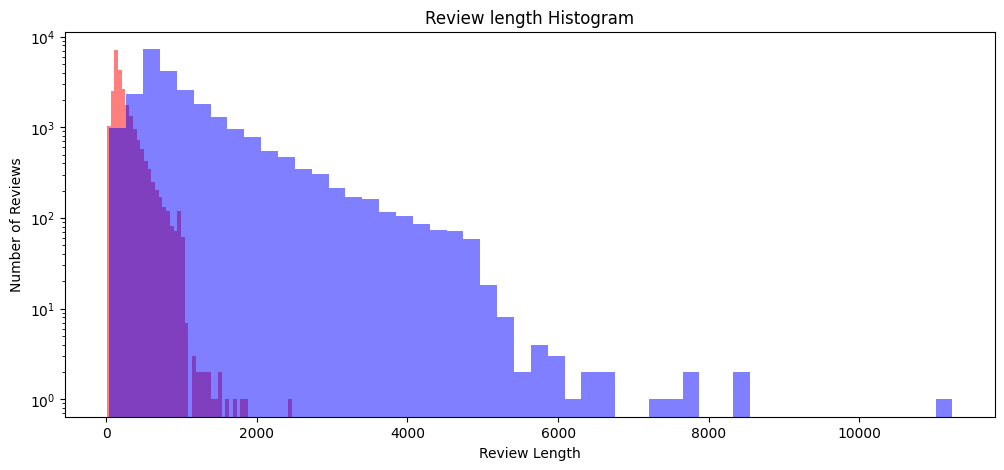

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.hist(len_by_space_tokenizing,bins=50,alpha=0.5,color='r',label='word')
plt.hist(len_by_sentence,bins=50,alpha=0.5,color='b',label='alphabet')

plt.yscale('log',nonpositive='clip')

plt.title("Review length Histogram")
plt.xlabel("Review Length")
plt.ylabel("Number of Reviews")

## 통계값

In [10]:
import numpy as np


#최대
print('문장 최대 길이 : {}'.format(np.max(len_by_space_tokenizing)))
#최소
print('문장 최소 길이 : {}'.format(np.min(len_by_space_tokenizing)))
#평균
print('문장 평균 길이 : {:.2f}'.format(np.mean(len_by_space_tokenizing)))
#표준편차
print('문장 길이 표준편차 : {:.2f}'.format(np.std(len_by_space_tokenizing)))
#중간값
print('문장 중간 길이 : {}'.format(np.median(len_by_space_tokenizing)))
#1사분위 25%
print('문장 1사분위 길이 : {}'.format(np.percentile(len_by_space_tokenizing,25)))
#3사분위 75%
print('문장 3사분위 길이 : {}'.format(np.percentile(len_by_space_tokenizing,75)))

문장 최대 길이 : 2470
문장 최소 길이 : 10
문장 평균 길이 : 233.79
문장 길이 표준편차 : 173.73
문장 중간 길이 : 174.0
문장 1사분위 길이 : 127.0
문장 3사분위 길이 : 284.0


## 박스플롯

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa02d0a7d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa02d0b6310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa02d0a7af0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa02d0b6850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa02d0b6d90>],
 'means': [<matplotlib.lines.Line2D at 0x7fa02d0b6af0>]}

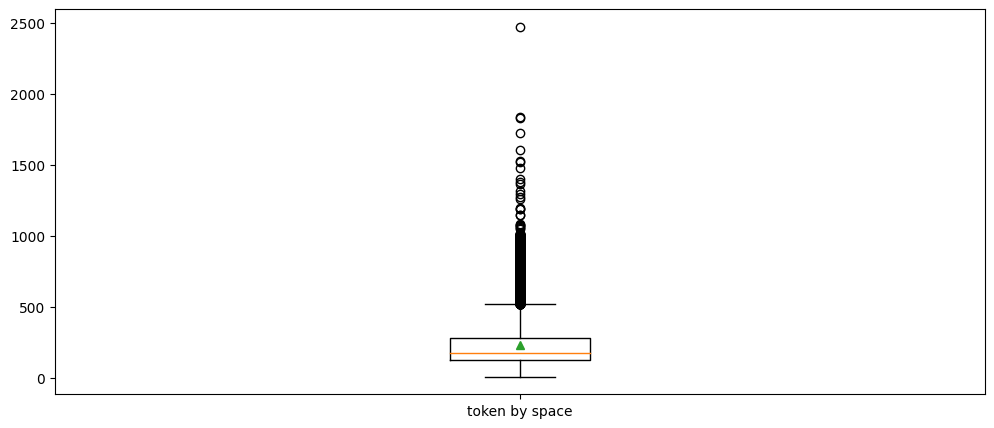

In [11]:
plt.figure(figsize=(12,5))
plt.boxplot([len_by_space_tokenizing],labels=['token by space'],showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa02d03f910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa02d03fe50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa02d03f670>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa02cfcc2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa02cfcc7f0>],
 'means': [<matplotlib.lines.Line2D at 0x7fa02cfcc550>]}

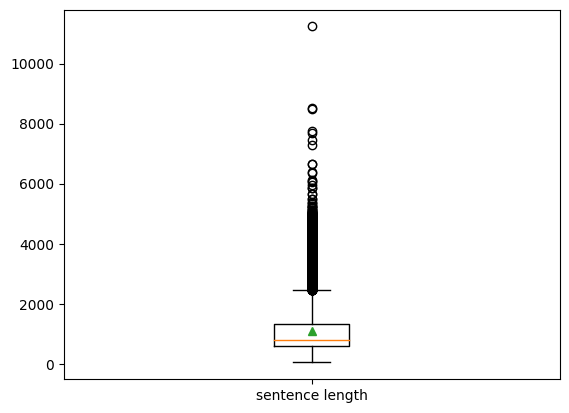

In [12]:
plt.boxplot([len_by_sentence],labels=['sentence length'],showmeans=True)

## WordCloud

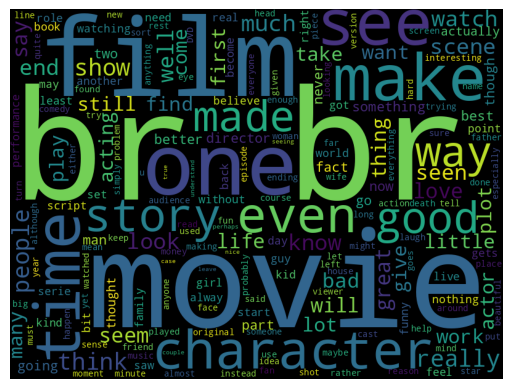

In [13]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud=WordCloud(stopwords=STOPWORDS,background_color='black',width=800,height=600).generate(' '.join(train_df['review']))
plt.axis("off")
plt.imshow(wordcloud)

## 라벨 분포 확인

<Axes: xlabel='sentiment', ylabel='count'>

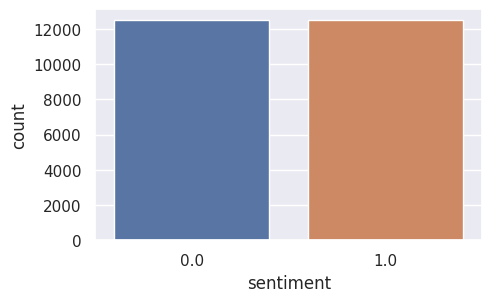

In [23]:
import seaborn as sns
sns.set(rc={'figure.figsize':(5,3)})
sns.countplot(x='sentiment',data=data)